In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

plt.rcParams['figure.dpi'] = 300

In [33]:
# chembl-antimicrobial-tasks repository needs to be cloned locally
PATH_TO_REPOSITORY = "/home/acomajuncosa/Documents/chembl-antimicrobial-tasks"

# Define Ersilia colors
ersilia_colors = ['#FAD782', '#FAA08B', '#DC9FDC', '#AA96FA', '#8DC7FA']
cc_colors = ["#EA5A49", "#B16BA8", "#5A72B5", "#7CAF2A", "#F39426"]

# Pathogen_mappings
pathogen_mappings = pd.read_csv(os.path.join(PATH_TO_REPOSITORY, "data", "pathogens.csv"))
pathogen_mappings = dict(zip(pathogen_mappings['pathogen_code'], pathogen_mappings['search_text']))

PATHOGENS=["abaumannii", "calbicans", "ecoli", "efaecium", "enterobacter", "hpylori", 
           "kpneumoniae", "mtuberculosis", "paeruginosa", "pfalciparum", "saureus", "smansoni", "spneumoniae"]
TARGETS = ['organism']

PATH_TO_DATA = "../data"
PATH_TO_OUTPUT = '../output/03_baseline_models'

In [34]:
PATHOGEN_TO_RESULTS = {}

for pathogen in PATHOGENS:
    for target in TARGETS:

        # Create a dict for each pathogen
        PATHOGEN_TO_RESULTS[pathogen] = {}

        # Get list of tasks
        tasks = sorted(os.listdir(os.path.join("..", "data", f"{pathogen}_{target}")))
        tasks = [i.replace(".csv", "") for i in tasks]

        # For each task
        for task in sorted(tasks):

            # Store results
            PATHOGEN_TO_RESULTS[pathogen][task] = {}

            # # Get NB Performances
            # NB = open(os.path.join(PATH_TO_OUTPUT, f"{pathogen}_{target}", task, "NB_CV.csv"), "r").read().split(",")
            # NB = np.array(NB).astype(float)
            # PATHOGEN_TO_RESULTS[pathogen][task]['NB'] = NB

            # Get RF Performances
            RF = open(os.path.join(PATH_TO_OUTPUT, f"{pathogen}_{target}", task, "RF_CV.csv"), "r").read().split(",")
            RF = np.array(RF).astype(float)
            PATHOGEN_TO_RESULTS[pathogen][task]['RF'] = RF

            # # Get LQ optuna performances
            # try:
            #     LQ_optuna = open(os.path.join(PATH_TO_OUTPUT, f"{pathogen}_{target}", task, "LQ_optuna_CV.csv"), "r").read().split(",")
            #     LQ_optuna = np.array(LQ_optuna).astype(float)
            #     PATHOGEN_TO_RESULTS[pathogen][task]['LQ_optuna'] = LQ_optuna
            # except:
            #     PATHOGEN_TO_RESULTS[pathogen][task]['LQ_optuna'] = [0.5]

            # # Get LQ TT performances
            # try:
            #     LQ_TT = open(os.path.join(PATH_TO_OUTPUT, f"{pathogen}_{target}", task, "LQ_TT_CV.csv"), "r").read().split(",")
            #     LQ_TT = np.array(LQ_TT).astype(float)
            #     PATHOGEN_TO_RESULTS[pathogen][task]['LQ_TT'] = LQ_TT
            # except:
            #     PATHOGEN_TO_RESULTS[pathogen][task]['LQ_TT'] = [0.5]


        break

In [35]:
def task_to_label(task, c):
    return f'task#{c} P{task.split("_")[0]}-S{task.split("_")[-1]}'

def simple_boxplot(ax, x, y, c, width):
    ax.boxplot(y, positions=[x], widths=width, patch_artist=True, whis=[0, 100],
               boxprops=dict(facecolor=c, color='black', lw=0.8),
               medianprops=dict(color='black', lw=0.8),
               whiskerprops=dict(color='black', lw=0.8),
               capprops=dict(color='none', lw=0.8))



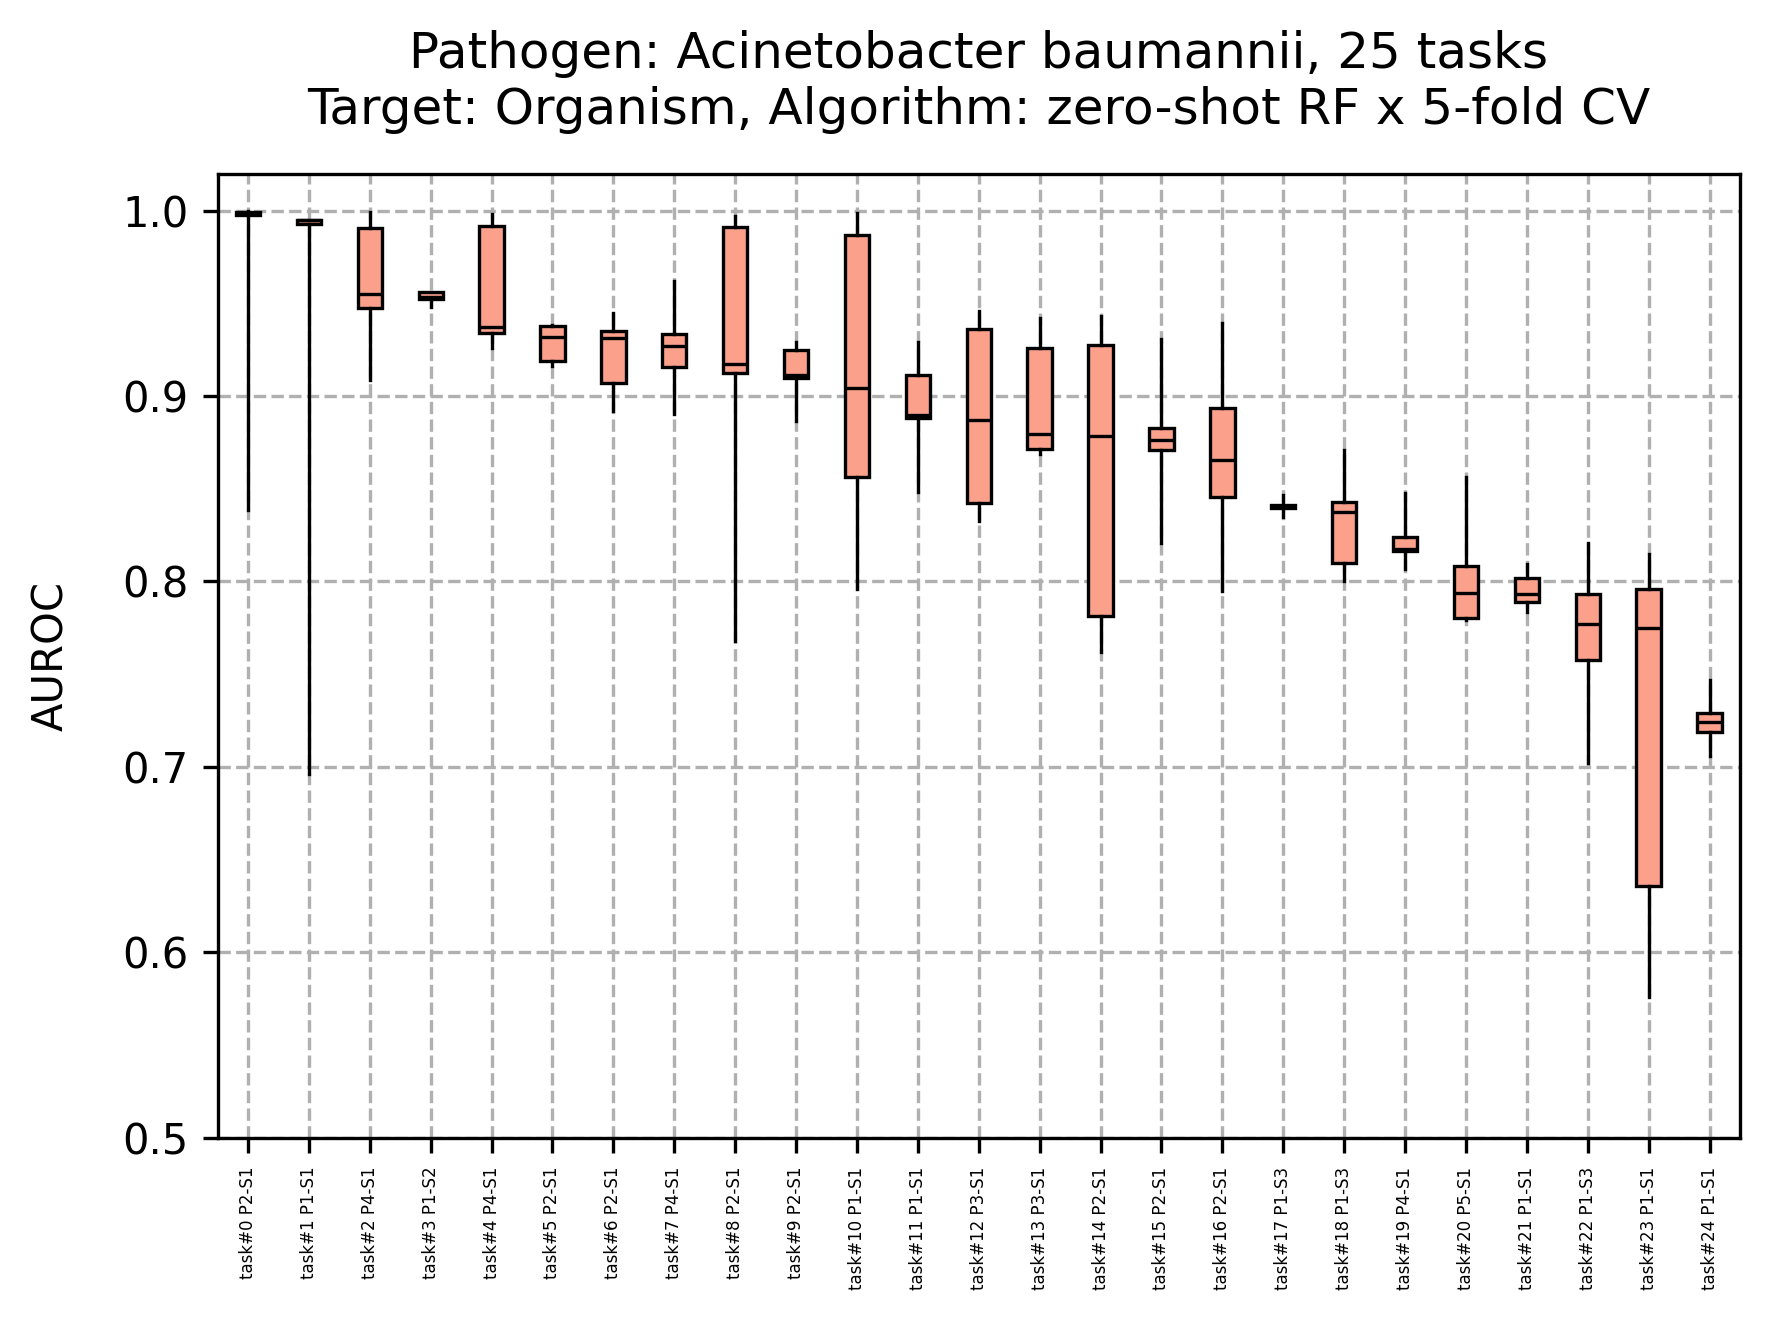

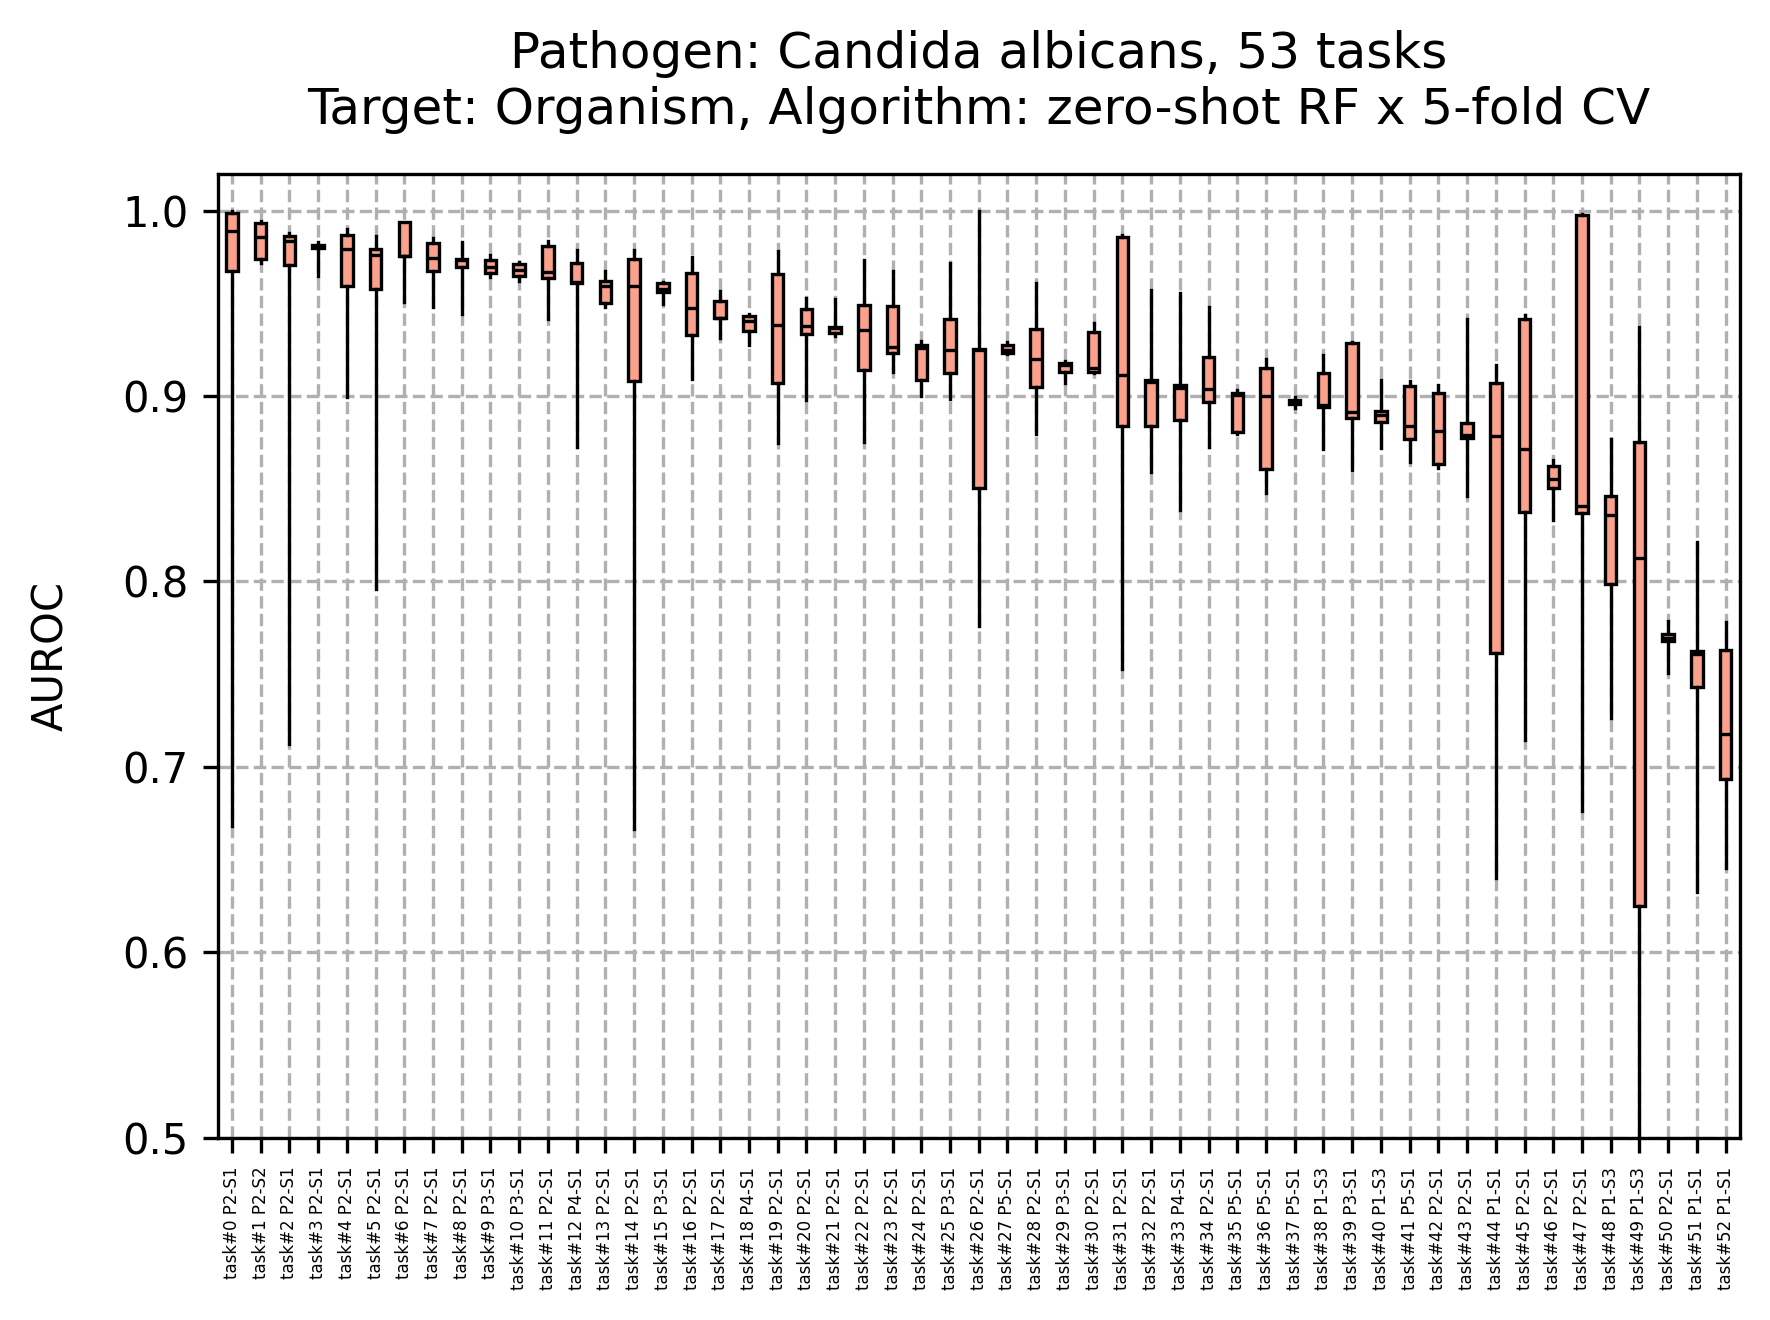

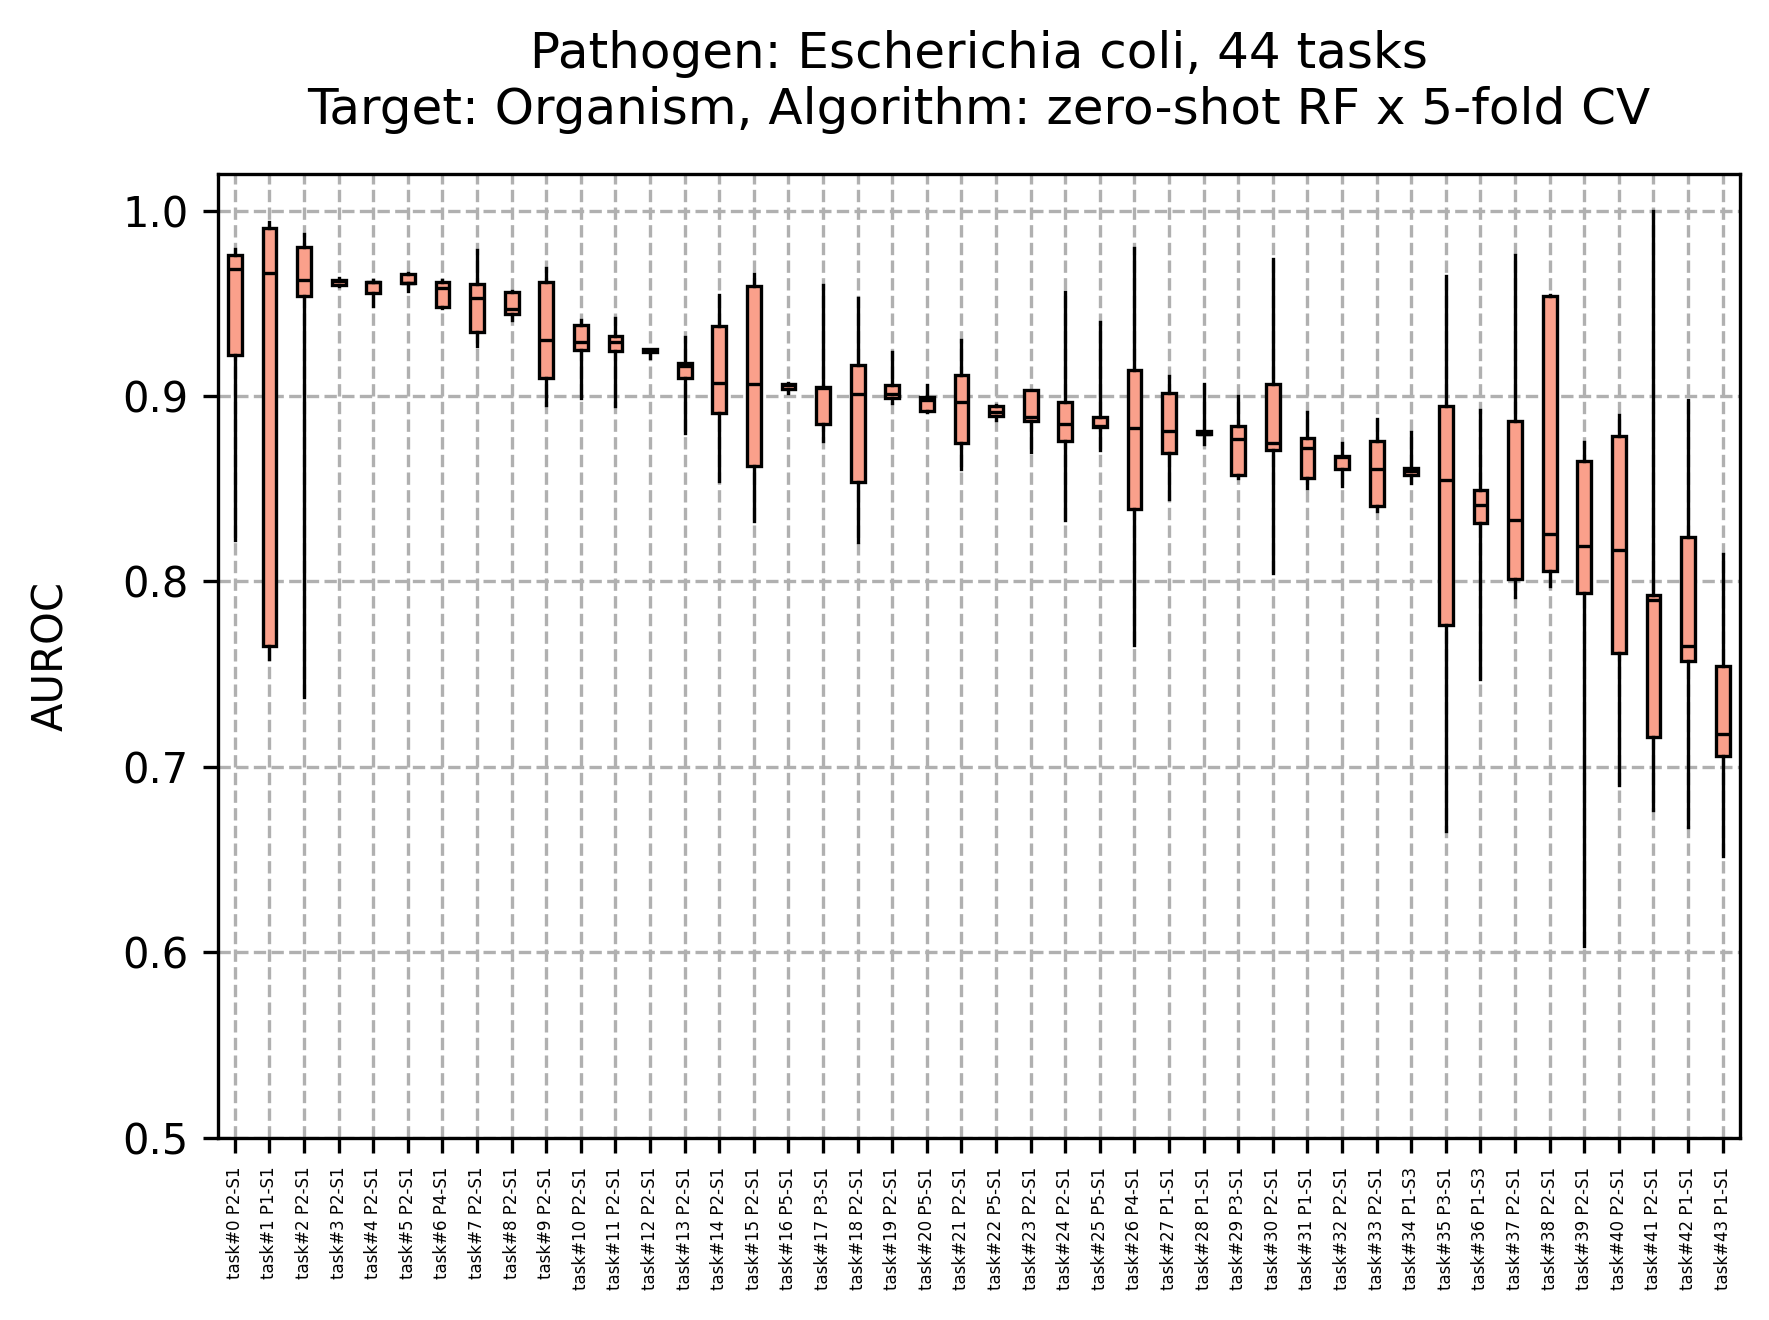

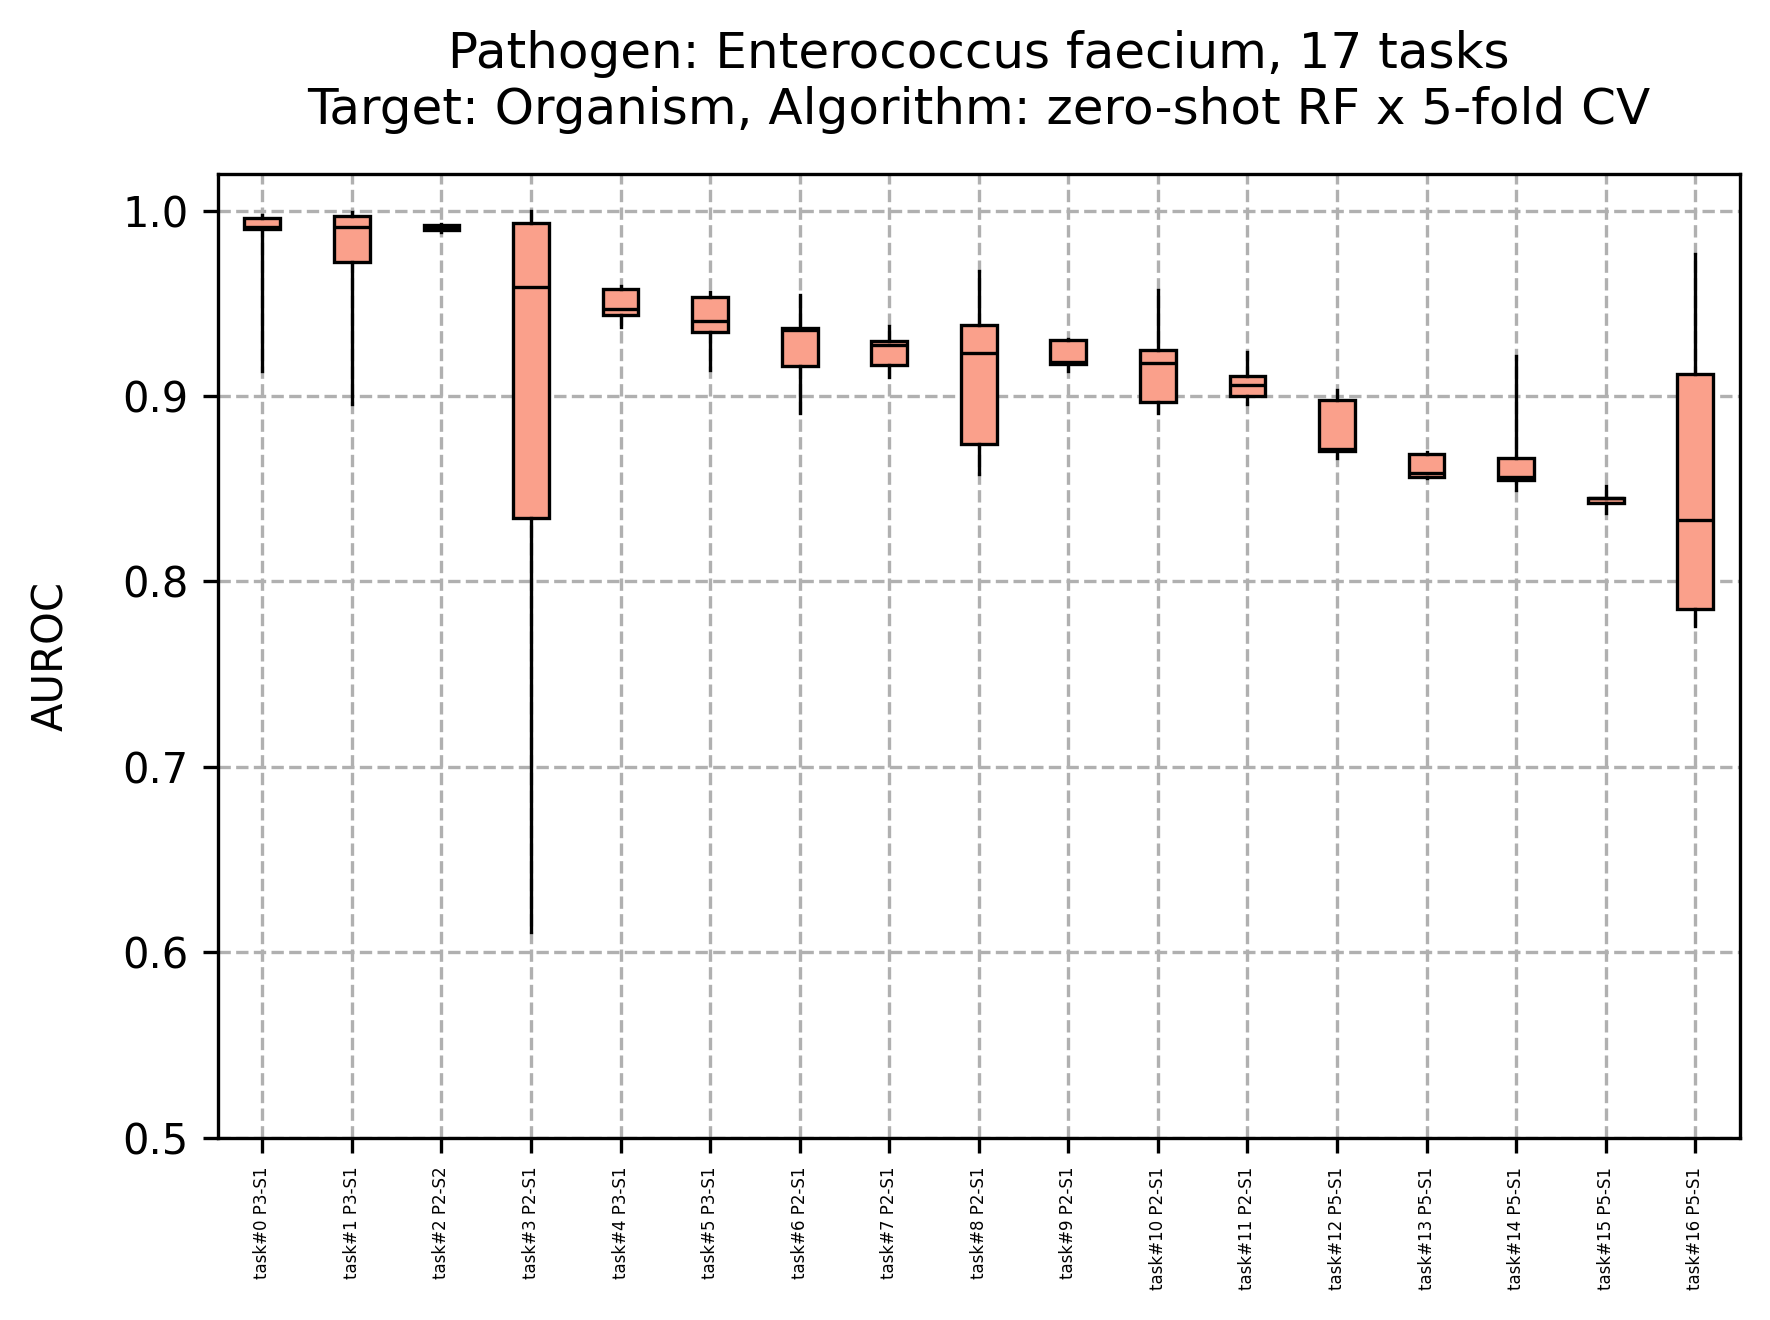

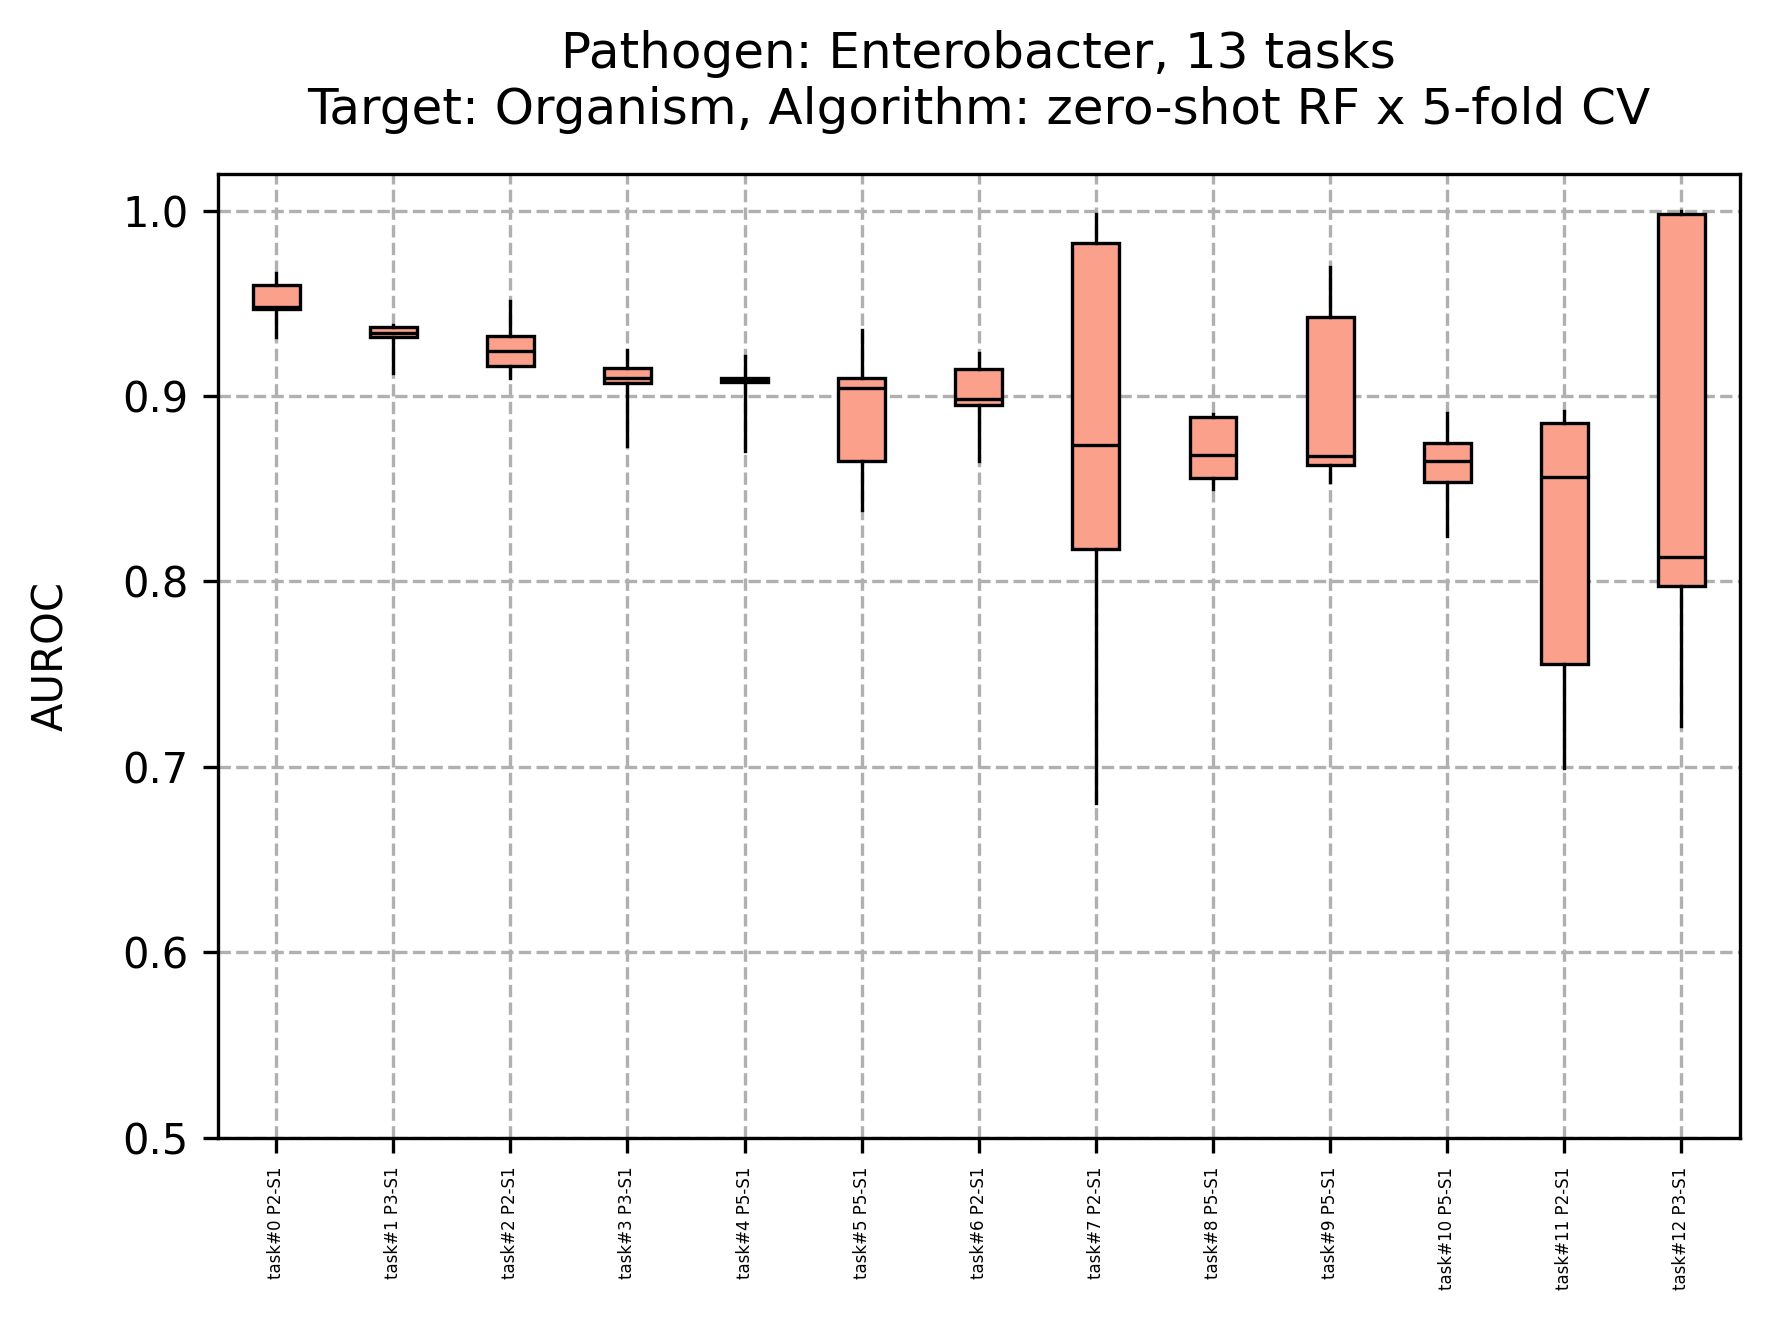

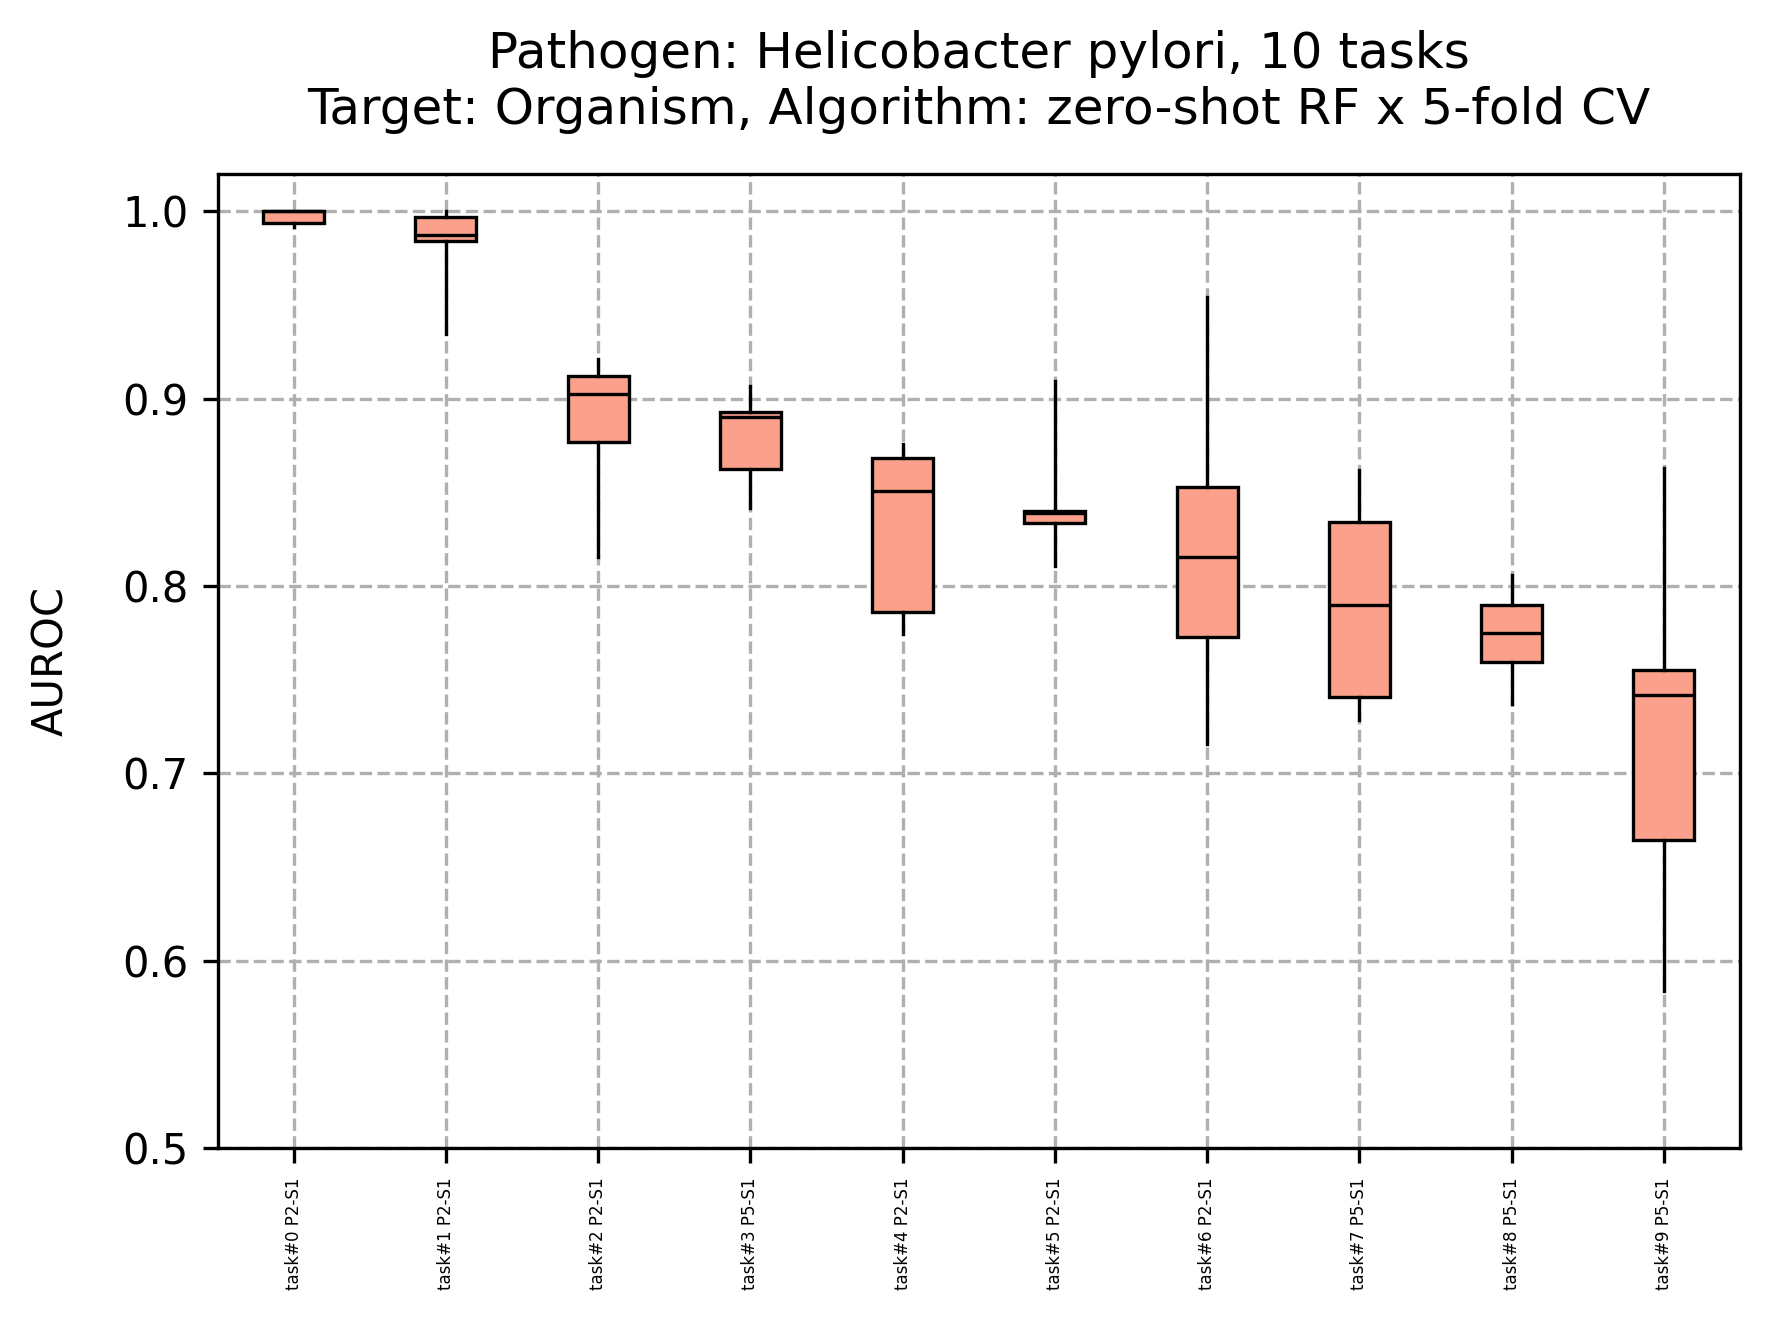

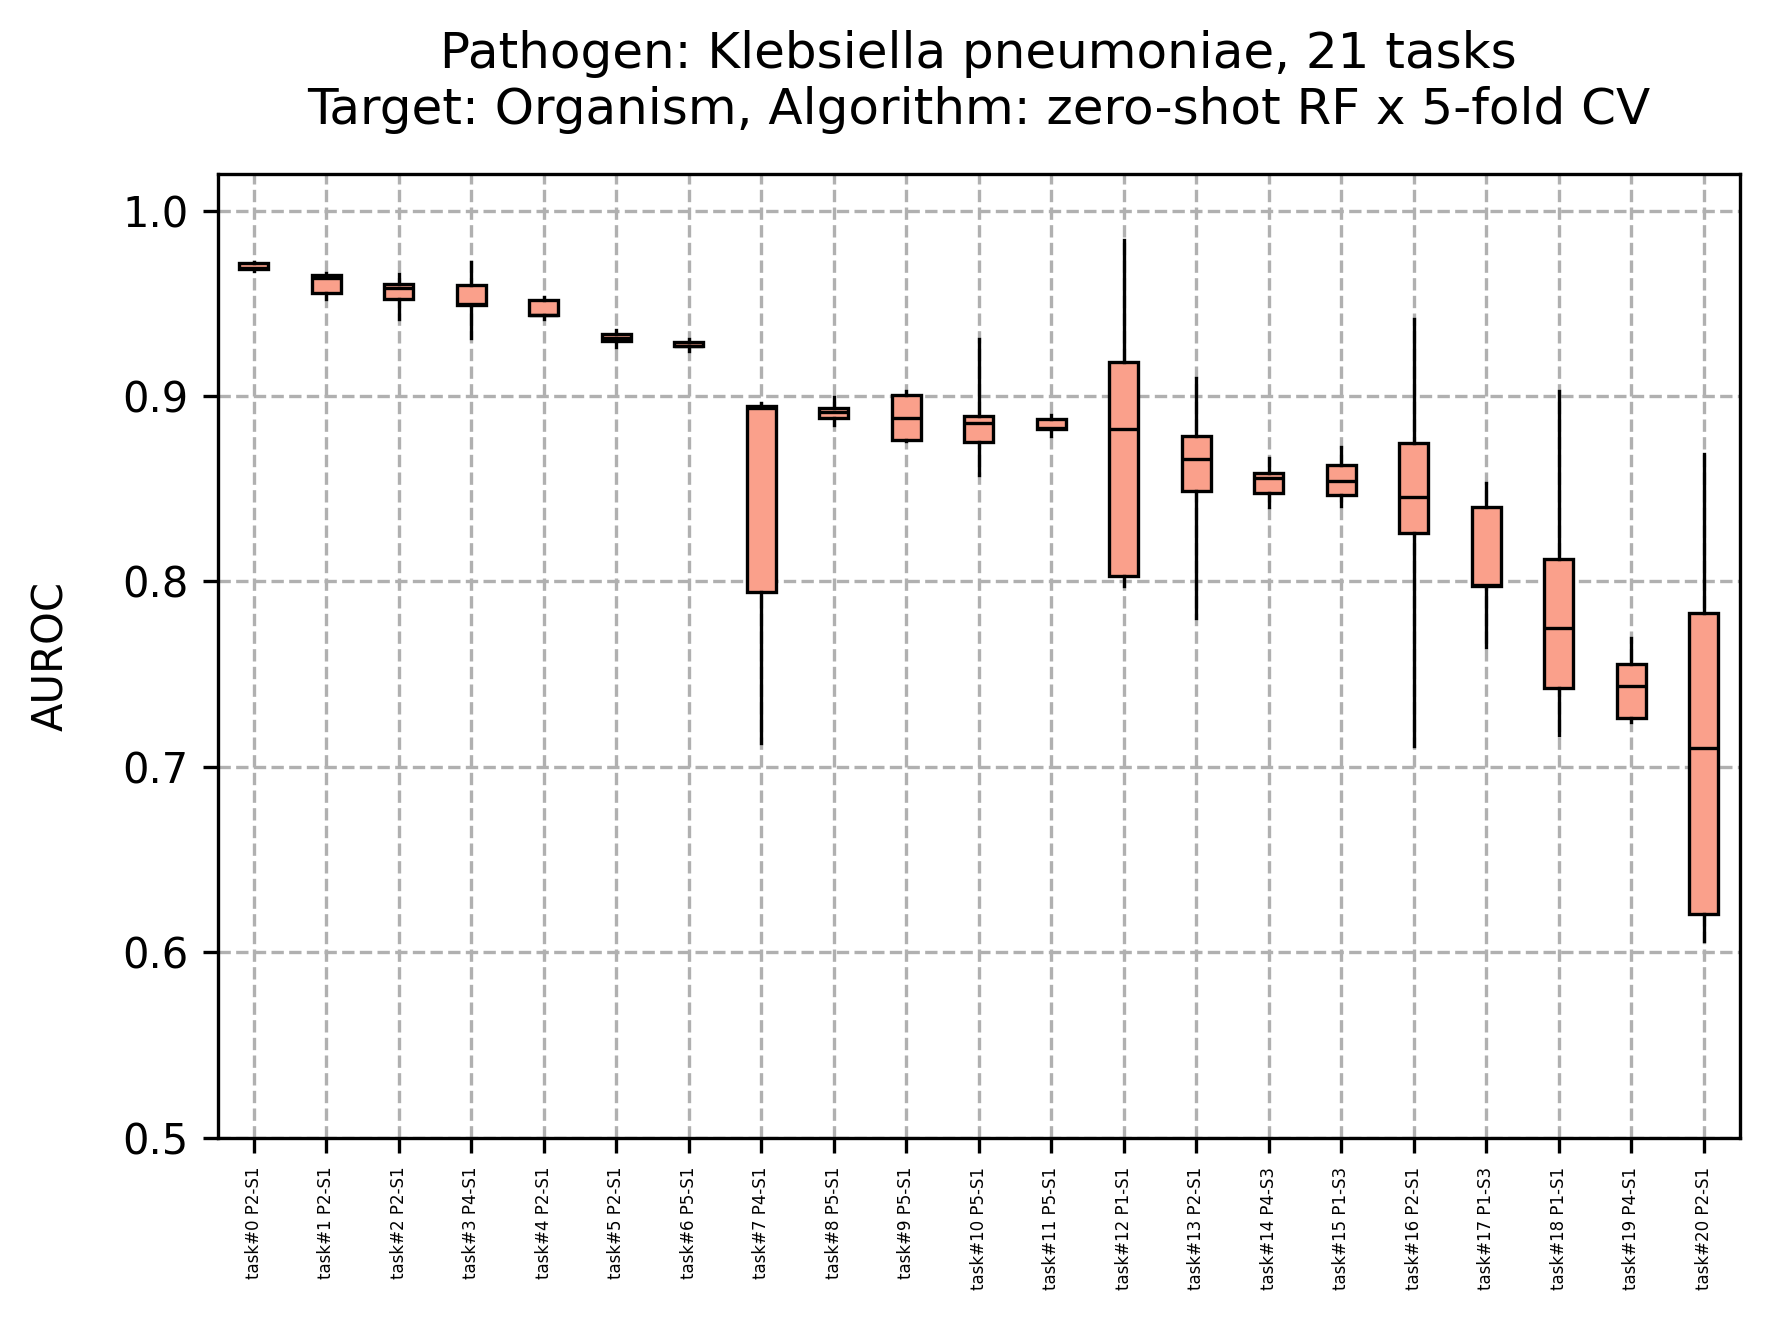

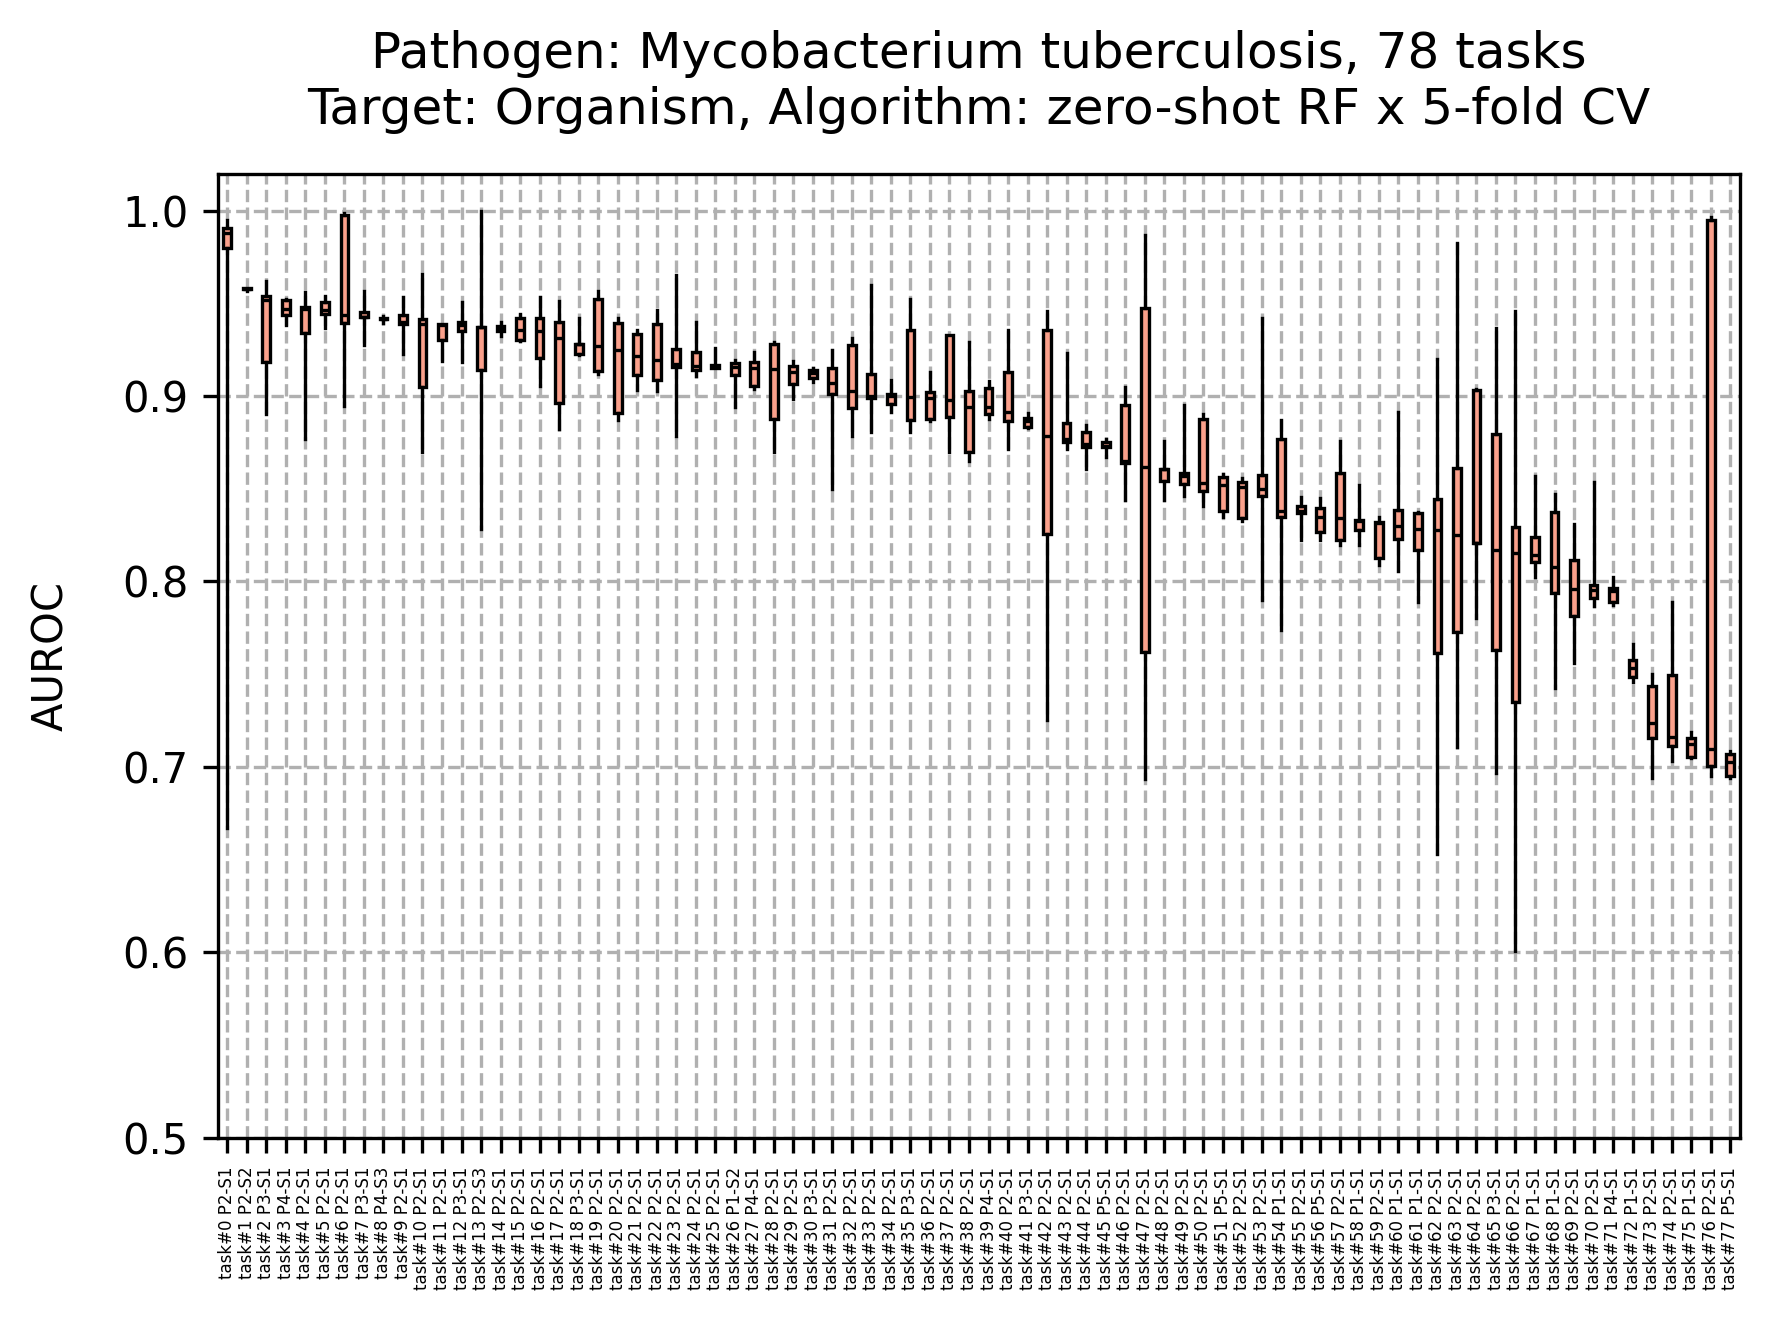

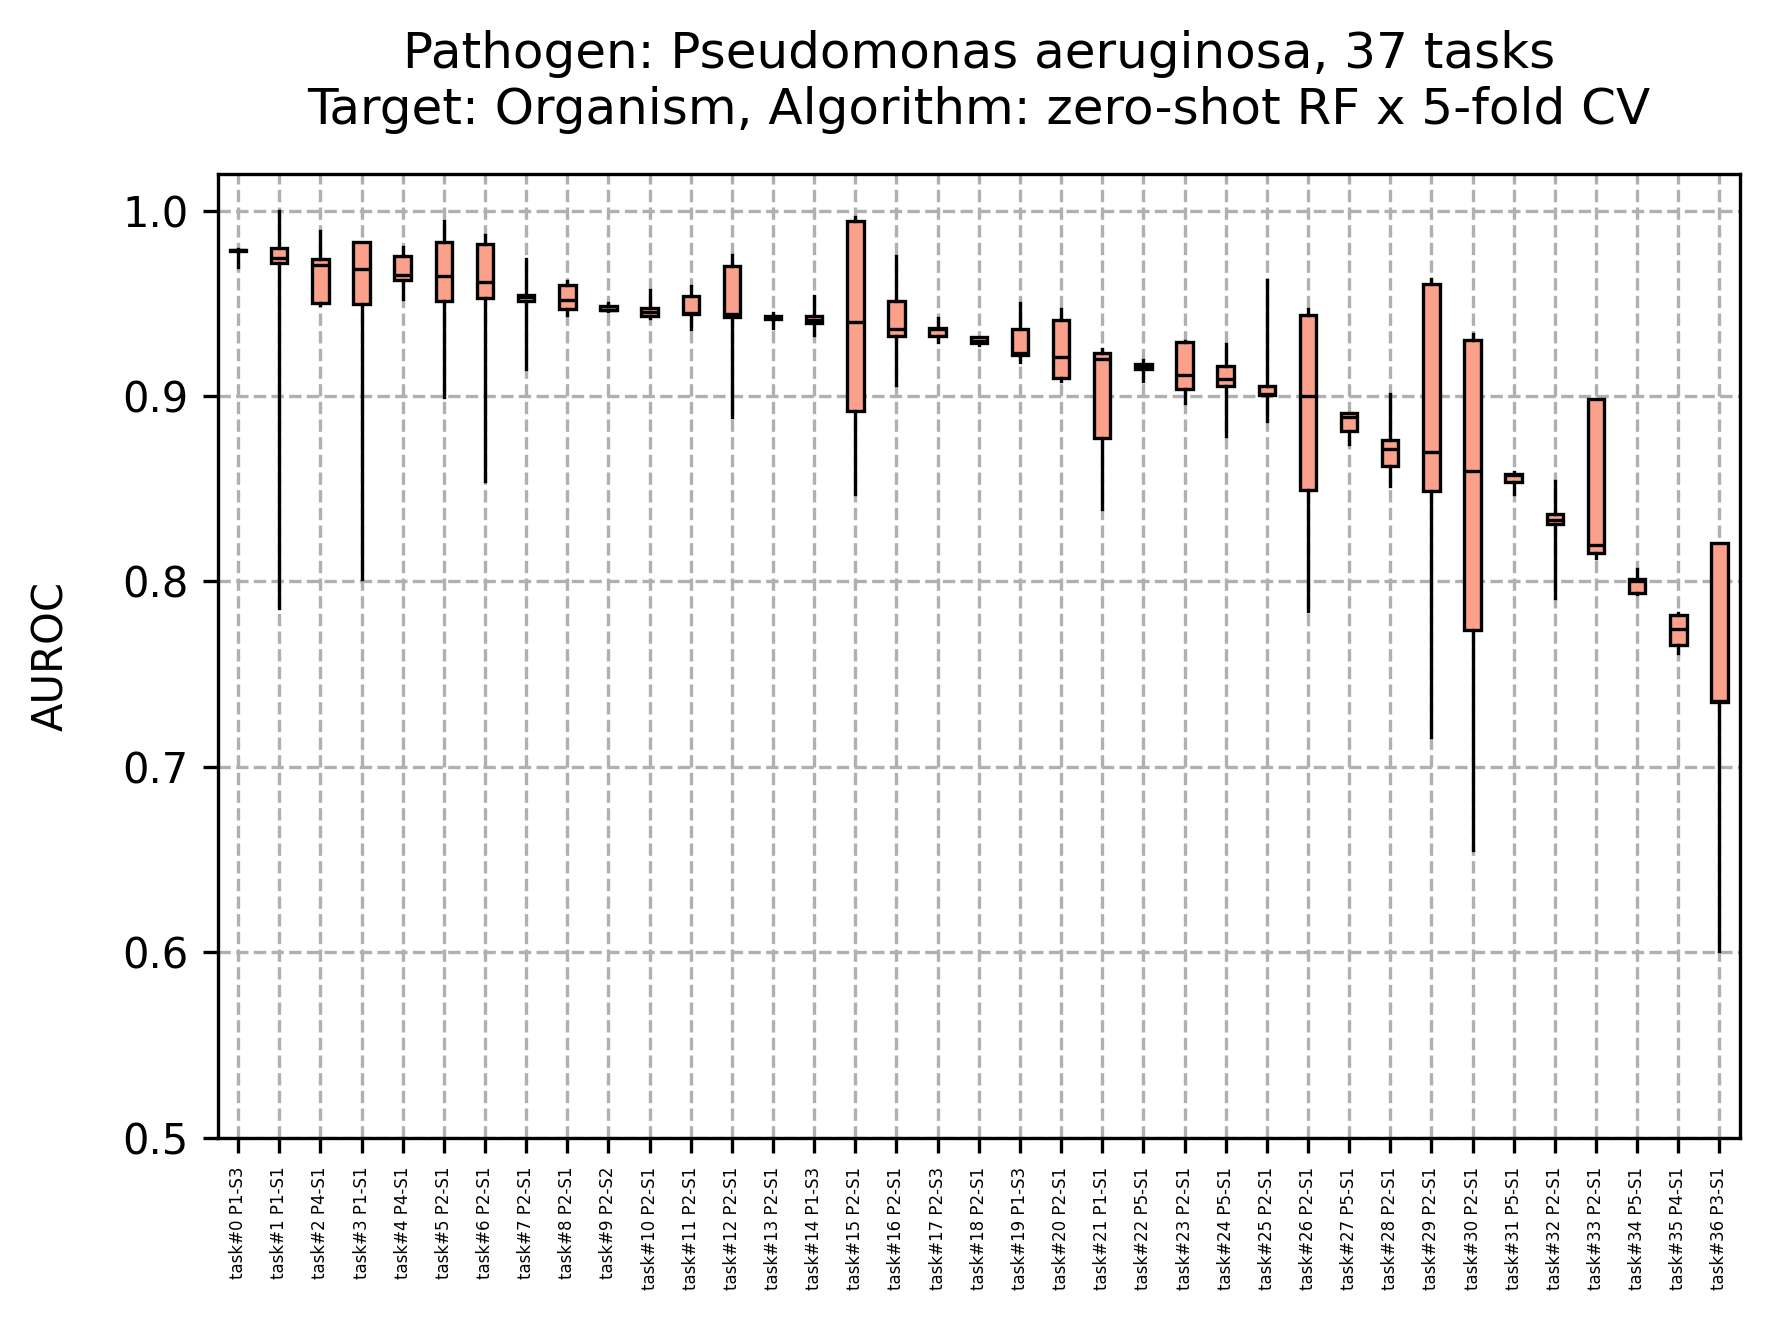

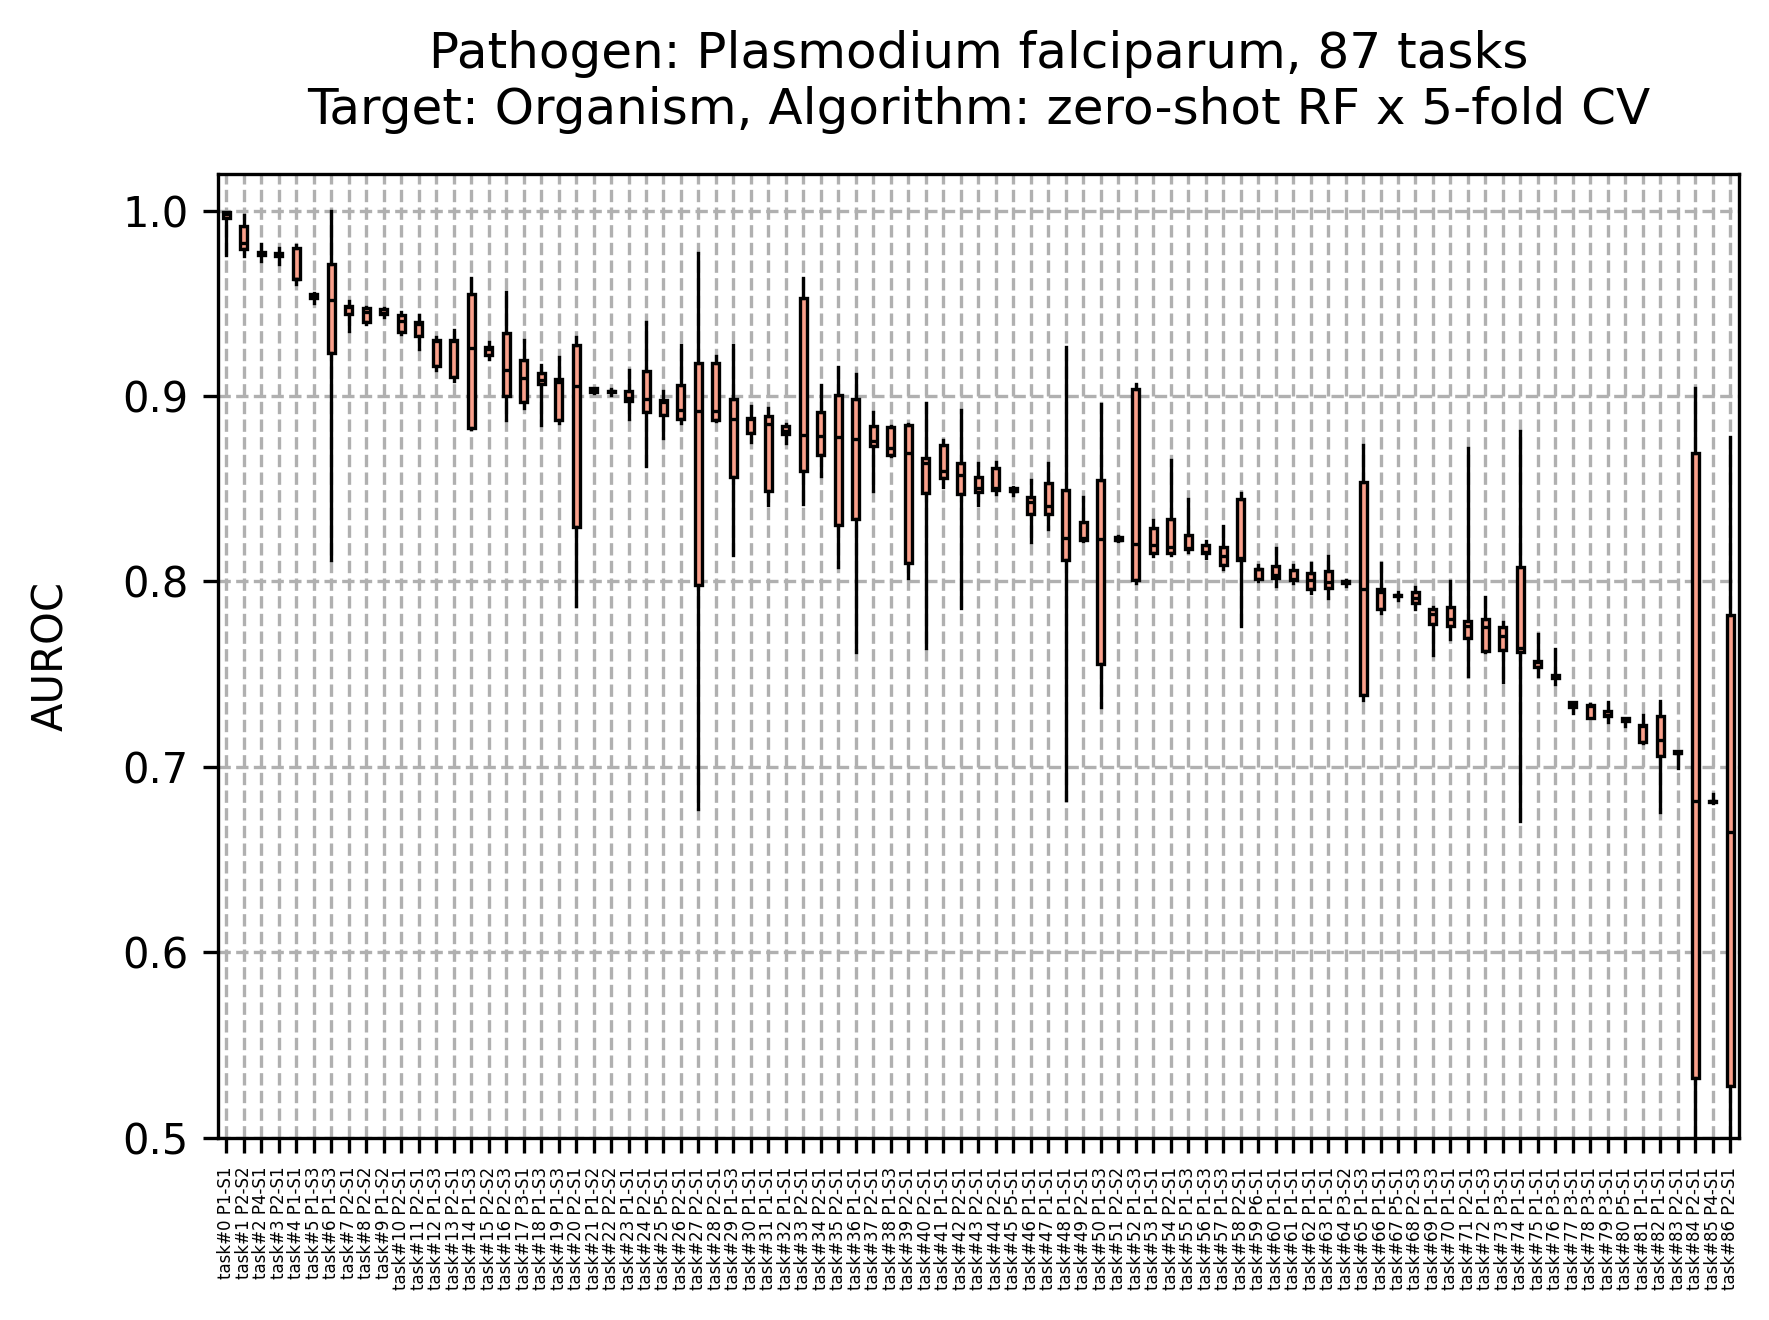

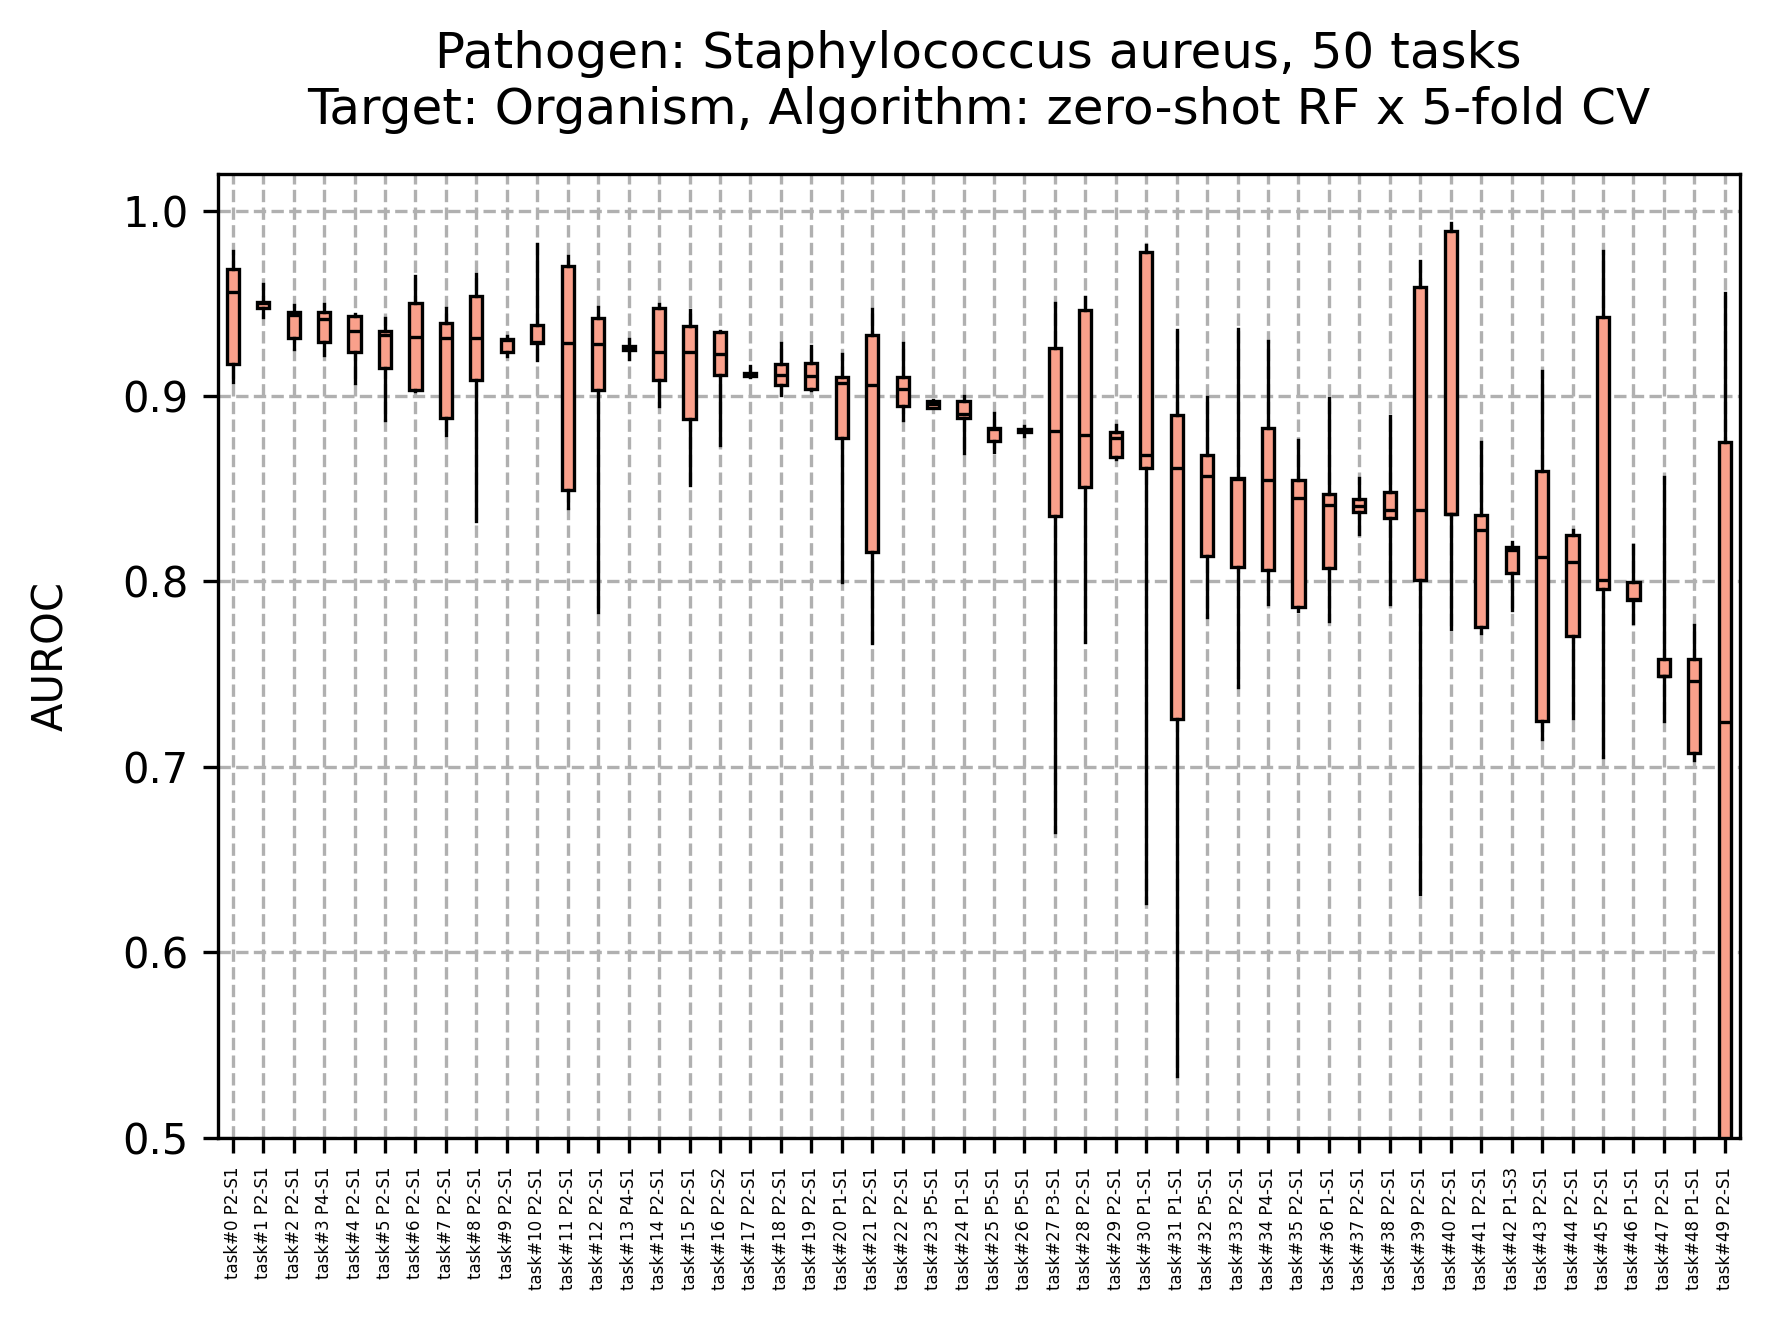

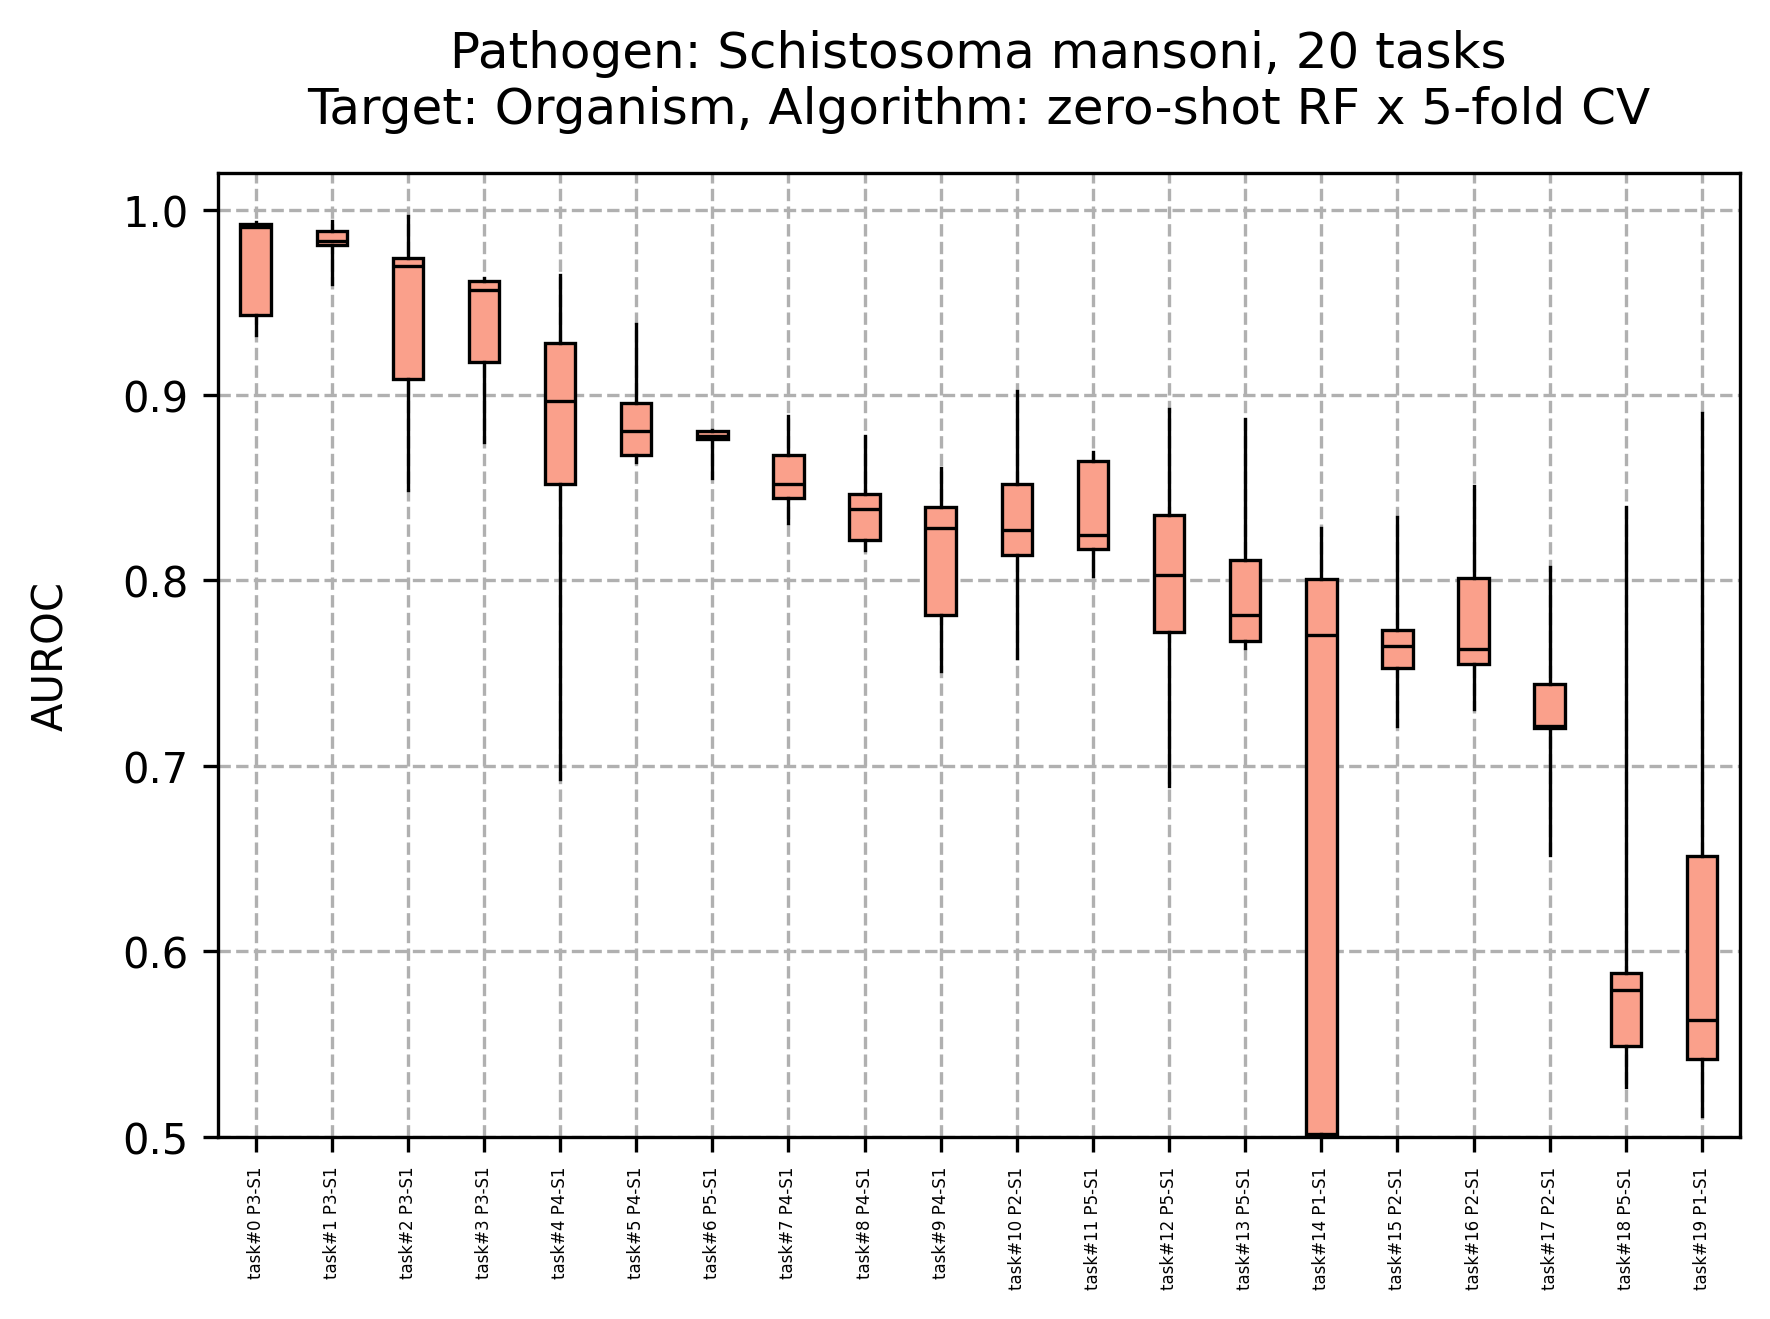

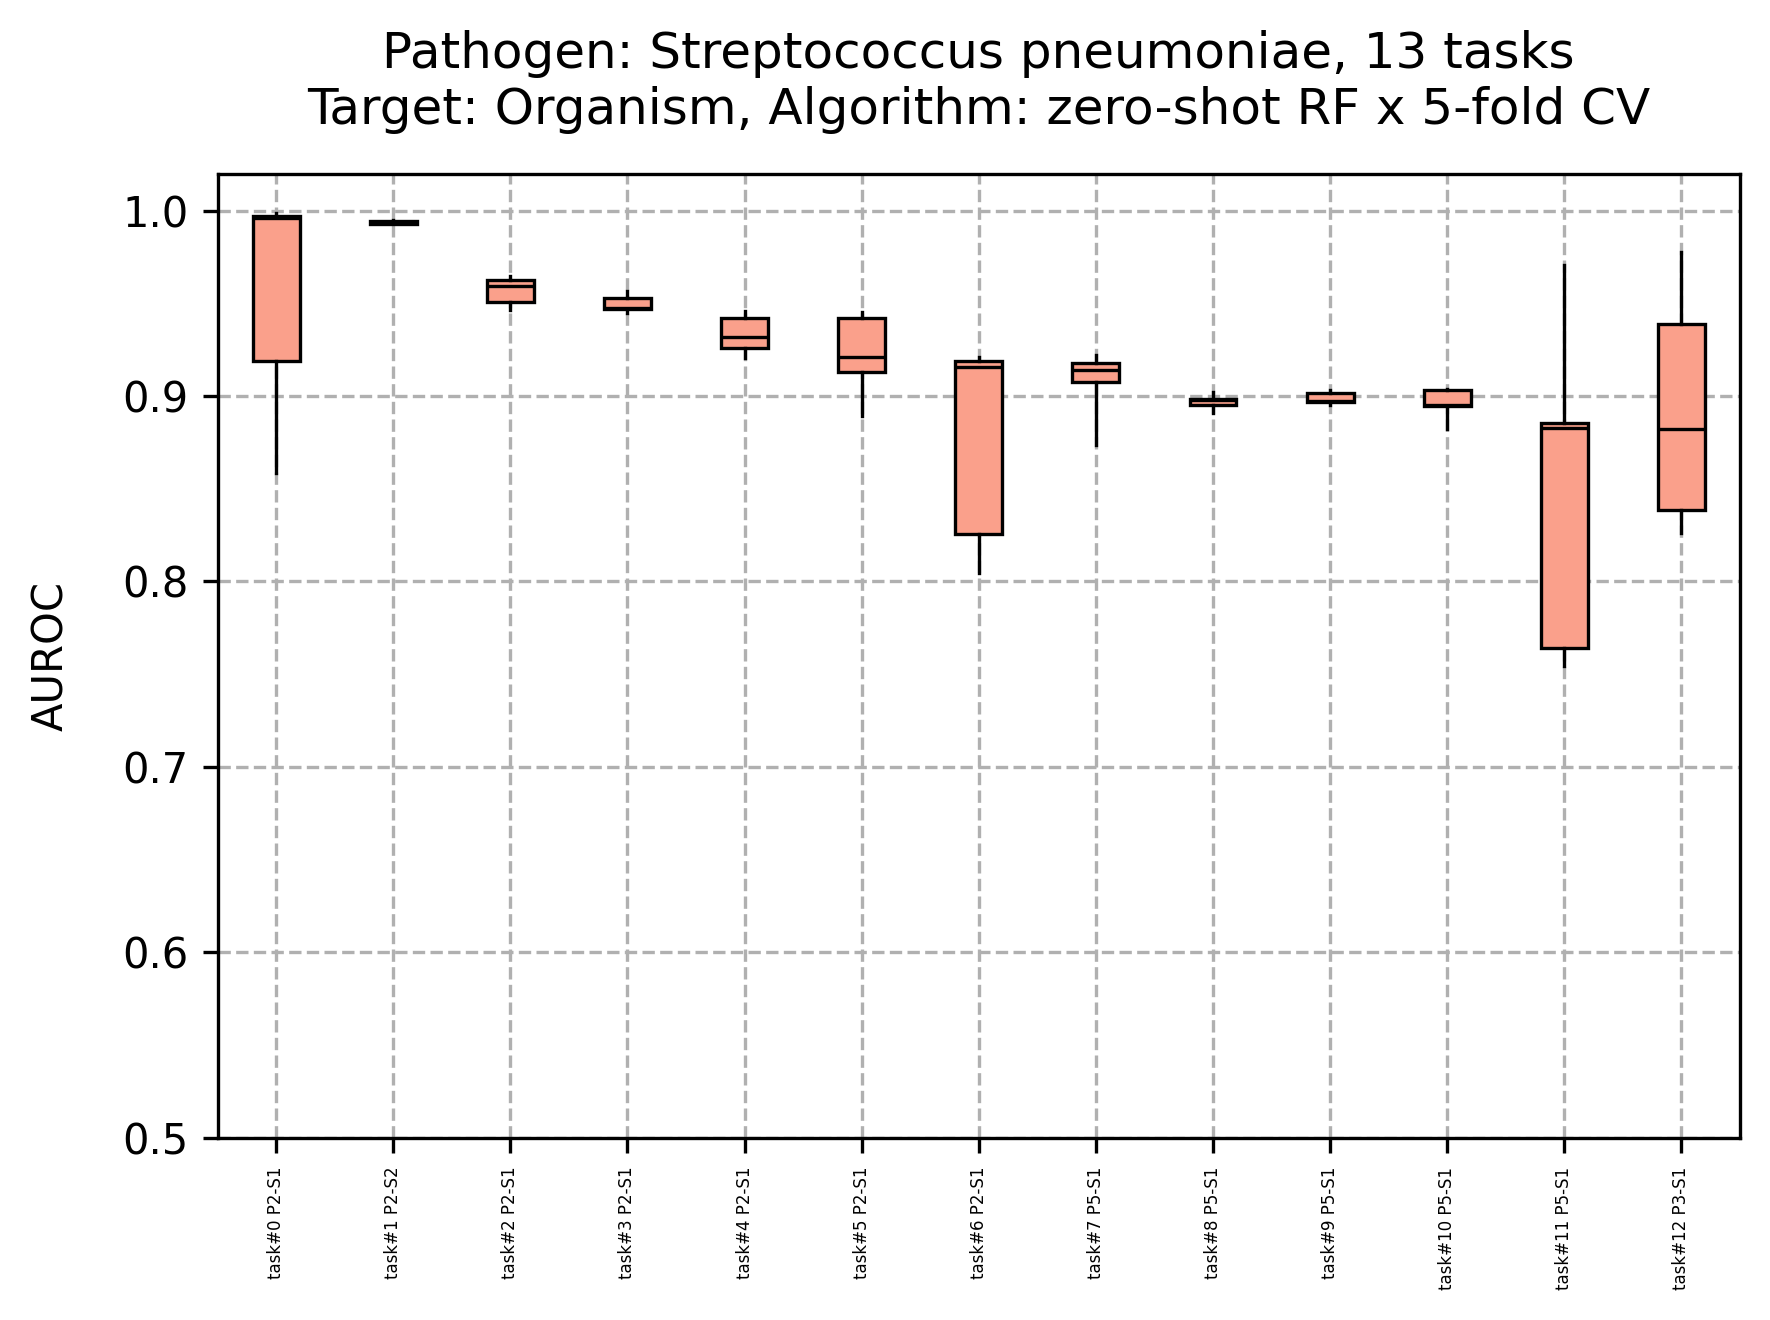

In [45]:
for pathogen in PATHOGENS:

    fig, ax = plt.subplots(1, 1, figsize=(6, 4.5))

    # Get tasks and define x
    tasks = sorted(PATHOGEN_TO_RESULTS[pathogen], key=lambda x: np.median(PATHOGEN_TO_RESULTS[pathogen][x]['RF']), reverse=True)
    x = [i for i in range(len(tasks))]

    # Number of performances 
    m = 0.4
    # models = ['NB', 'RF', 'LQ_optuna', 'LQ_TT']
    models = ['RF']
    colors = {'NB': '#FAD782', 'RF': '#FAA08B', 'LQ_optuna': '#DC9FDC', 'LQ_TT': '#AA96FA'}

    # For each task
    for c1, task in enumerate(tasks):
        if len(models) > 1:
            h = np.linspace(c1-m, c1+m, len(models))
            w = (max(h) - min(h)) / len(models)
        else:
            h = [c1]
            w = m
        for c2, perf in enumerate(models):
            simple_boxplot(ax, h[c2], PATHOGEN_TO_RESULTS[pathogen][task][perf], colors[perf], width=w)
    

    # Other stuff
    title = f"Pathogen: {pathogen_mappings[pathogen]}, {len(x)} tasks\nTarget: {target.capitalize()}, Algorithm: zero-shot RF x 5-fold CV"
    plt.ylabel("AUROC", labelpad=12)
    plt.title(title, size=12, pad=12)
    plt.xticks(x, [task_to_label(i, c) for c, i in enumerate(tasks)], rotation=90, size=4)
    plt.grid(linestyle='--')
    plt.ylim(0.50, 1.02)
    plt.tight_layout()
    plt.show()


In [16]:
np.linspace(0-m, 0+m, 2)

array([-0.4,  0.4])